## DATA SET INFO
- Our dataset is about the crimes and arrest details that happened in Dallas city. (Link: https://www.dallasopendata.com/Public-Safety/Police-Arrests/sdr7-6v3j/about_data)
- Our dataset has 108160 rows and 65 columns.
- Our datset have details about Incident information, Location of the information, Officer and arrest details, Culprit information, 

 ## QUESTION OF INTREST
- How do factors such as demographics, location, and time period impact arrest patterns, and how can these data points be utilized to predict future arrests with machine learning models?

In [1]:
#First import the dataset into the jupyter
import pandas as pd
data = pd.read_csv(r"C:\Users\hp\OneDrive\Documents\Deployement\dataset.csv")
data.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_17952\2443013738.py:3: DtypeWarning: Columns (14,30,45,46,54,55,59) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Users\hp\OneDrive\Documents\Deployement\dataset.csv")


,IncidentNum,ArrestYr,ArrestNumber,ArArrestDate,ArArrestTime,ArBkDate,ArLAddress,ArLApt,ArLZip,ArLCity,...,TatooComment,Occupation,JobSchStatus,Employer,Drug,DrugRelated,DrugType,ClothingWorn,Expunged,UpZDate
0,053778-2023,2023,23-008157,"Mar 30, 2023",23:00,"Mar 31, 2023",12670 E NORTHWEST HWY,NaN,75228.0,DALLAS,...,NaN,NaN,NaN,NaN,NaN,No,NaN,"SHIRT, JEANS",NaN,2023-03-31 00:48:16
1,053735-2023,2023,23-008152,"Mar 30, 2023",20:58,"Mar 31, 2023",1633 N COCKRELL HILL RD,NaN,75211.0,DALLAS,...,NaN,NaN,NaN,NaN,NaN,No,NaN,"YELLOW REFLECTIVE VEST, BLUE JEANS, BOOTS",NaN,2023-03-31 00:29:25
2,049964-2023,2023,23-007555,"Mar 24, 2023",20:50,"Mar 24, 2023",1700 JULIUS SCHEPPS FWY,NaN,75216.0,DALLAS,...,NaN,NaN,NaN,NaN,NaN,No,NaN,GRAY HOODIE AND BLACK PANTS,NaN,2023-03-24 23:15:44
3,053425-2023,2023,23-008106,"Mar 30, 2023",10:58,"Mar 30, 2023",18777 MIDWAY RD,NaN,75287.0,DALLAS,...,NaN,NaN,NaN,NaN,NaN,No,NaN,"CAMO JACKET, WHITE TANK TOP, GREEN SHORTS",NaN,2023-03-30 15:19:01
4,053204-2023,2023,23-008062,"Mar 29, 2023",23:26,"Mar 30, 2023",5700 JUNIUS ST,NaN,75214.0,DALLAS,...,NaN,NaN,NaN,NaN,NaN,Yes,Methamphetamine,BLACK SHIRT AND SHORTS,NaN,2023-03-30 02:04:48


 ## EXPLORATORY DATA ANALYSIS

In [2]:
# These are the libraries we will be using
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Introduction and Description
print("Dataset Overview:")
print(data.info())
# with this we can see what type of data it is

print("\nDataset Description:")
print(data.describe())
# with this we will get the statistics of the data




Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108160 entries, 0 to 108159
Data columns (total 65 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   IncidentNum      108160 non-null  object 
 1   ArrestYr         108160 non-null  int64  
 2   ArrestNumber     108160 non-null  object 
 3   ArArrestDate     108160 non-null  object 
 4   ArArrestTime     108160 non-null  object 
 5   ArBkDate         107919 non-null  object 
 6   ArLAddress       108140 non-null  object 
 7   ArLApt           8945 non-null    object 
 8   ArLZip           108123 non-null  float64
 9   ArLCity          108079 non-null  object 
 10  ArState          107722 non-null  object 
 11  ArLCounty        106110 non-null  object 
 12  ArLRA            91114 non-null   float64
 13  ArLBeat          105366 non-null  float64
 14  ArLDistrict      101244 non-null  object 
 15  ArLSector        64401 non-null   float64
 16  ArADOW           108

# TARGET VARIABLE
- For this project, we have chosen AgeAtArrestTime as the target variable, which represents the exact age of an individual at the time of arrest. 

- This is a continuous numerical variable, making it suitable for Linear Regression.

- By predicting the specific age, we can derive more detailed insights into arrest patterns, enabling future analysis and interventions.

**Why AgeAtArrestTime:**
- Precision: Unlike categorical age groups, AgeAtArrestTime gives us the exact age of the individual, allowing for more granular predictions and analysis.

- Actionable Insights: Predicting the exact age provides greater utility for law enforcement and policy-making, such as targeting specific age groups for crime prevention efforts.

- Regression Suitability: As a continuous variable, it aligns perfectly with Linear Regression, a model that predicts numerical outcomes based on input features like location, time of day, etc.


**What can we do with this:**
- Using this model, we can predict the exact age of an individual at the time of arrest based on location and time factors.

- This can be useful for law enforcement agencies to understand trends, allocate resources effectively, and target specific age groups for crime prevention.

- Additionally, it provides a foundation for future regression analysis, where more factors could be added to improve prediction accuracy.



In [3]:
# Converted 'ArArrestTime' to datetime and create 'TimeOfDay'
data['ArArrestTime'] = pd.to_datetime(data['ArArrestTime'], format='%H:%M', errors='coerce')

# Created 'TimeOfDay' feature based on hour of arrest
data['TimeOfDay'] = data['ArArrestTime'].dt.hour.apply(lambda x: 
    'Morning' if 5 <= x < 12 else
    'Afternoon' if 12 <= x < 17 else
    'Evening' if 17 <= x < 21 else
    'Night')

print(data[['ArArrestTime', 'TimeOfDay']].head())

# Ensuring 'AgeAtArrestTime' has no missing values 
data = data.dropna(subset=['AgeAtArrestTime'])

# Features and target for our modeling
features = ['ArLCity', 'TimeOfDay']
target = 'AgeAtArrestTime'

# Splitting the data into features (X) and target (y)
X = data[features]
y = data[target]

print("Features preview:")
print(X.head())
print("Target preview:")
print(y.head())



         ArArrestTime TimeOfDay
0 1900-01-01 23:00:00     Night
1 1900-01-01 20:58:00   Evening
2 1900-01-01 20:50:00   Evening
3 1900-01-01 10:58:00   Morning
4 1900-01-01 23:26:00     Night
Features preview:
  ArLCity TimeOfDay
0  DALLAS     Night
1  DALLAS   Evening
2  DALLAS   Evening
3  DALLAS   Morning
4  DALLAS     Night
Target preview:
0    29.0
1    50.0
2    23.0
3    35.0
4    39.0
Name: AgeAtArrestTime, dtype: float64


### **Summary:**

- In our project, we aimed to predict the exact **age of individuals at the time of arrest** using features such as the **city of arrest** and the **time of day** when the arrest took place. To achieve this, we selected **AgeAtArrestTime** as our target variable and used **Linear Regression** to build our predictive model.


- First, we processed the dataset to ensure that our features were properly structured. The **ArArrestTime** column, which provides the time of the arrest, was transformed into a categorical variable, **TimeOfDay**, representing the periods **Morning**, **Afternoon**, **Evening**, and **Night**. This allows us to capture the time patterns associated with arrests. Additionally, we retained **ArLCity**, representing the city where the arrest occurred, as an important feature.


- After preprocessing, our dataset included two main features: **ArLCity** and **TimeOfDay**, and the target variable **AgeAtArrestTime**, which gives the exact age of the arrestee. These variables were prepared for regression analysis to predict the age of individuals based on where and when they were arrested.


- By focusing on this continuous target variable, we are able to provide more precise insights into the demographic patterns of arrests, allowing for more targeted analysis and predictions. This approach enables our model to be both predictive and useful for understanding broader trends in the relationship between arrest timings, locations, and the ages of individuals involved.

## CHECKING MISSING VALUES 

In [4]:
missing_ages = data['AgeAtArrestTime'].isnull().sum()
print(f"Number of missing values in 'AgeAtArrestTime' column: {missing_ages}")

print("\nDistribution of AgeAtArrestTime (basic stats):\n", data['AgeAtArrestTime'].describe())

print("\nUnique values in 'AgeAtArrestTime':", sorted(data['AgeAtArrestTime'].unique()))

#verification of the age values
print("\nSample Verification of Ages:")
for i in range(5):
    age = data['AgeAtArrestTime'].iloc[i]
    print(f"Sample {i+1} - AgeAtArrestTime: {age}")



Number of missing values in 'AgeAtArrestTime' column: 0

Distribution of AgeAtArrestTime (basic stats):
 count    101833.00000
mean         35.23243
std          12.00854
min          18.00000
25%          26.00000
50%          33.00000
75%          43.00000
max          91.00000
Name: AgeAtArrestTime, dtype: float64

Unique values in 'AgeAtArrestTime': [18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 85.0, 86.0, 87.0, 88.0, 91.0]

Sample Verification of Ages:
Sample 1 - AgeAtArrestTime: 29.0
Sample 2 - AgeAtArrestTime: 50.0
Sample 3 - AgeAtArrestTime: 23.0
Sample 4 - AgeAtArrestTime: 35.0
Sample 5 - AgeAtArrestTime: 39.0


- This code replaces missing values in the categorical features (DrugType, TimeOfDay, ArLCity) with 'Unknown', ensuring no assumptions are made about the data.

##  1)Distribution of ages vary across different cities ?

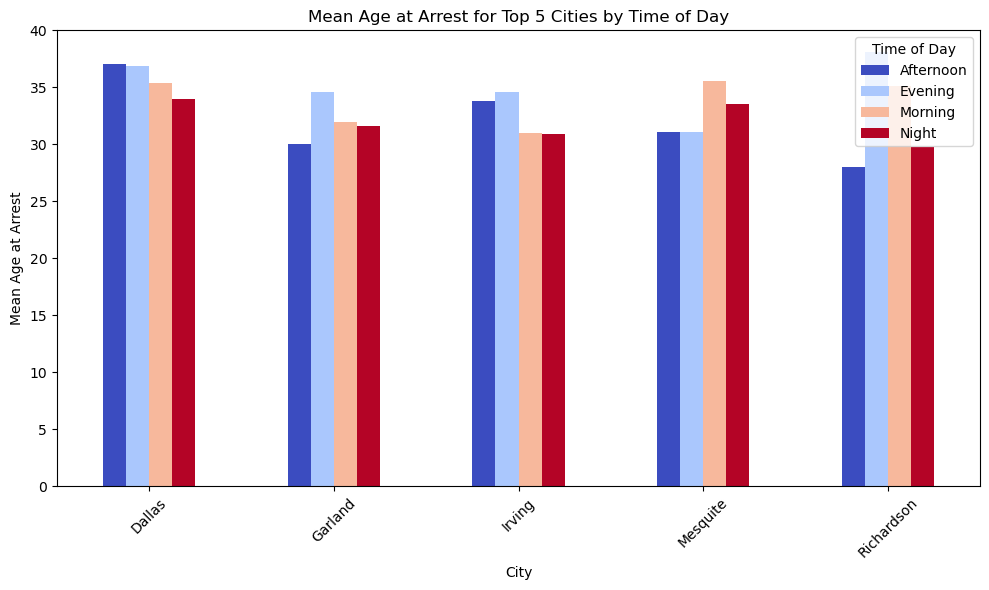

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Standardizing the ArLCity column
data['ArLCity'] = data['ArLCity'].str.strip().str.title()

# Finding the top 5 cities with the most arrests
top_cities = data['ArLCity'].value_counts().head(5).index

# Filtering data for only the top cities
filtered_data = data[data['ArLCity'].isin(top_cities)]

# Calculating the mean age grouped by City and Time of Day
mean_age_by_city_time = filtered_data.groupby(['ArLCity', 'TimeOfDay'])['AgeAtArrestTime'].mean().unstack()

# Plotting our grouped bar plot
mean_age_by_city_time.plot(kind='bar', figsize=(10, 6), colormap='coolwarm')
plt.title('Mean Age at Arrest for Top 5 Cities by Time of Day')
plt.xlabel('City')
plt.ylabel('Mean Age at Arrest')
plt.xticks(rotation=45)
plt.legend(title='Time of Day')
plt.tight_layout()
plt.show()










- The mean age at arrest remains relatively consistent across the top five cities (Dallas, Garland, Irving, Mesquite, and Richardson). This indicates that age distribution does not vary drastically by location within these cities.
   
- Arrests during the Afternoon and Evening show slightly higher mean ages compared to arrests during the Morning and Night, particularly in Dallas and Garland. This suggests a potential behavioral or situational pattern based on the time of day.

- Although the age trends are similar, Dallas stands out as the city with the most arrests, emphasizing its significance in contributing to the overall data trends.

## 2) Age difference between individuals involving weapons?

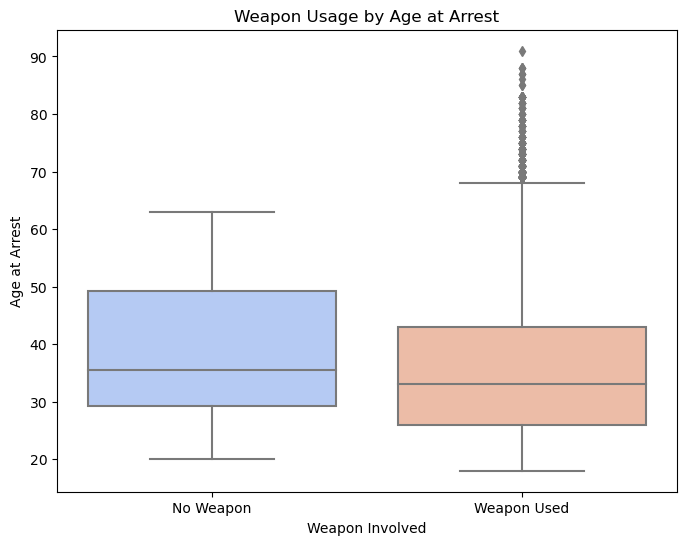

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Created a column that indicates if a weapon was involved
data['WeaponUsed'] = data['ArWeapon'].notnull()

# Want to use Box plot comparing AgeAtArrestTime for weapon-related vs non-weapon-related arrests because it can show some outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='WeaponUsed', y='AgeAtArrestTime', data=data, palette='coolwarm')

plt.title('Weapon Usage by Age at Arrest')
plt.xlabel('Weapon Involved')
plt.ylabel('Age at Arrest')
plt.xticks([0, 1], ['No Weapon', 'Weapon Used'])
plt.show()


- Individuals involved in weapon-related arrests tend to be younger (median age around 35) compared to non-weapon-related arrests (median age around 40).

- Weapon-related arrests show more older outliers, with some individuals being arrested at ages above 70, which is less common in non-weapon-related arrests.

- The age distribution in weapon-related arrests is slightly wider, indicating that a broader range of ages is involved compared to non-weapon-related arrests.

 ## 3)Age distribution of arrestees over years?

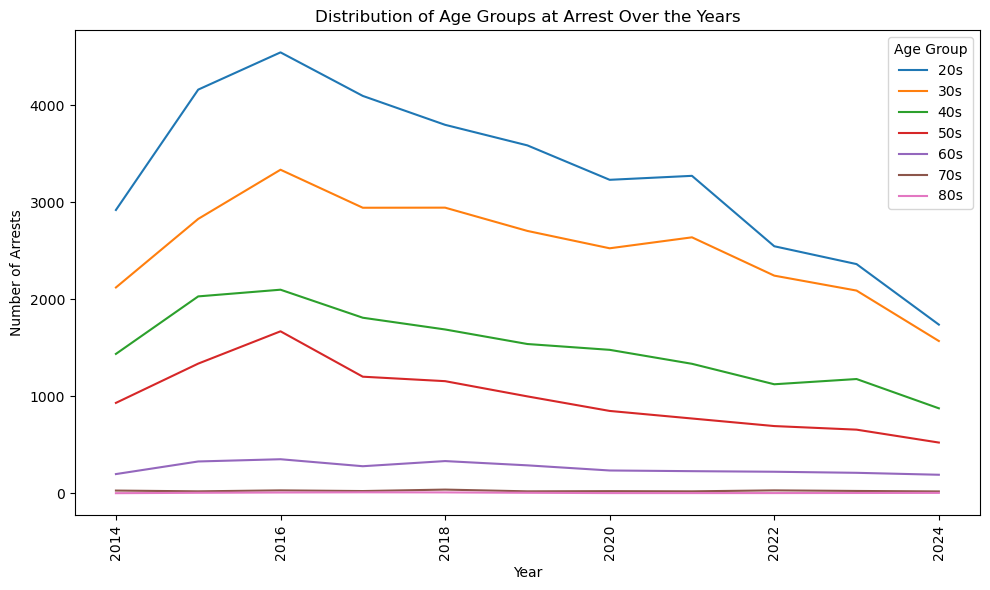

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting year from the arrest date and create a new column 'ArrestYear'
data['ArrestYear'] = pd.to_datetime(data['ArArrestDate'], errors='coerce').dt.year

# Creating bins for specific age ranges
age_bins = [20, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['20s', '30s', '40s', '50s', '60s', '70s', '80s']

# Creating a new column for age group
data['AgeGroup'] = pd.cut(data['AgeAtArrestTime'], bins=age_bins, labels=age_labels)

# Counting occurrences of each age group per year
age_group_year = data.groupby(['ArrestYear', 'AgeGroup']).size().unstack()

# Plotting the age groups over the years
plt.figure(figsize=(10, 6))

# Plotting each age group
for age_group in age_group_year.columns:
    sns.lineplot(x=age_group_year.index, y=age_group_year[age_group], label=age_group)

plt.title('Distribution of Age Groups at Arrest Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Arrests')
plt.legend(title='Age Group')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout to avoid cutoff

plt.show()



- All age groups show a general **decline in the number of arrests** from 2016 onward. The most significant decrease is observed in the **20s** and **30s** age groups, which had the highest number of arrests initially.

- The **20s** and **30s** age groups consistently have the **most arrests** across all years, suggesting that younger individuals are more frequently involved in arrests compared to older age groups.

- The arrest numbers for individuals in their **60s, 70s, and 80s** are much lower and remain relatively **stable** over the years, with only slight fluctuations, indicating that older individuals are less commonly arrested.

 ## **Data Preparation: Handling the missing values and cleaning data**

In [8]:
# Dropping columns with >50% missing values
missing_threshold = 0.5
data_cleaned = data.dropna(thresh=int(missing_threshold * len(data)), axis=1)

# Filling missing values for numeric and categorical columns
for col in data_cleaned.columns:
    if data_cleaned[col].dtype in ['float64', 'int64']:
        # Use median for numeric columns
        data_cleaned[col].fillna(data_cleaned[col].median(), inplace=True)
    else:
        # Check if column is categorical
        if pd.api.types.is_categorical_dtype(data_cleaned[col]):
            # Add 'Missing' as a new category
            data_cleaned[col] = data_cleaned[col].cat.add_categories(['Missing'])
        # Replace missing values with 'Missing'
        data_cleaned[col].fillna('Missing', inplace=True)

print("\nMissing values after cleaning:", data_cleaned.isnull().sum().sum())


C:\Users\hp\AppData\Local\Temp\ipykernel_17952\189149058.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col].fillna('Missing', inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_17952\189149058.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col].fillna(data_cleaned[col].median(), inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_17952\189149058.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s


Missing values after cleaning: 0


 - We have used Chatgpt for dropping the columns which havemore than 50% of the null values and to verify it

# MODEL CONSTRUCTION


- We will build a classification model to predict the Age of individuals at the time of arrest based on different features.

- Columns with more than 50% missing values have already been dropped, and missing values in numeric and categorical columns have been filled using median and mode.

**MODEL SELECTION**


- Since the target variable (age) is continuous , and the features are a mix of categorical and numerical types, we opted for the Linear Regression algorithm. 

**LINEAR REGRESSION**

In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#Handling outliers using IQR method
Q1 = data['AgeAtArrestTime'].quantile(0.25)
Q3 = data['AgeAtArrestTime'].quantile(0.75)
IQR = Q3 - Q1

# Removing rows with AgeAtArrestTime outside the IQR range
data_cleaned = data[(data['AgeAtArrestTime'] >= Q1 - 1.5 * IQR) & (data['AgeAtArrestTime'] <= Q3 + 1.5 * IQR)]

# Selecting the required features and target variable
features = ['ArLCity', 'TimeOfDay', 'ArrestYear']
target = 'AgeAtArrestTime'

# selecting Categorical and numerical features
categorical_features = ['ArLCity', 'TimeOfDay']
numerical_features = ['ArrestYear']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ])

# Defining the pipeline with Linear Regression
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Splitting the data into training and test sets
X = data_cleaned[features]
y = data_cleaned[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fitting the model
model_pipeline.fit(X_train, y_train)

#Making the predictions
y_pred = model_pipeline.predict(X_test)

#Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")



Mean Absolute Error: 9.599274881230501
R-squared: 0.013186271366885882


- As you can see aabove, we tried using Linear Regression to predict the continuous target AgeAtArrestTime, by changing different features including but not limited to time of day and location. Our Results were not that great after trying many combinations for this task in terms of performance. We thought that converting age to categorical might be better to try so, we shifted to Logistic Regression to predict things such as 0-20, 21-30, etc.

## Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Defining features and target
features = ['DrugType', 'DrugRelated', 'ArLCity', 'TimeOfDay', 'ArrestYr']
target = 'AgeGroup'

#Cleaning the data
data_clean = data[features + [target]].dropna()

#Excluding rare classes (like 70s and 80s)
rare_classes = ['70s', '80s']
data_filtered = data_clean[~data_clean['AgeGroup'].isin(rare_classes)]

#Separating features (X) and target (y) with filtered data
X_filtered = data_filtered[features]
y_filtered = data_filtered[target]

# Preprocessing for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), features)
    ]
)

# Encoding features
X_encoded = preprocessor.fit_transform(X_filtered)

# Applying the Random Oversampling to balance the dataset
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_encoded, y_filtered)

#Logistic Regression pipeline
logreg_pipeline = Pipeline(steps=[
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

#Fitting the model
logreg_pipeline.fit(X_train, y_train)

#Making the predictions
y_pred = logreg_pipeline.predict(X_test)

#Evaluating our model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Logistic Regression Accuracy: {accuracy}")
print("Classification Report:\n", report)



Logistic Regression Accuracy: 0.32267605633802815
Classification Report:
               precision    recall  f1-score   support

         20s       0.33      0.53      0.41      1398
         30s       0.24      0.16      0.19      1411
         40s       0.28      0.27      0.27      1397
         50s       0.31      0.18      0.22      1463
         60s       0.41      0.48      0.44      1431

    accuracy                           0.32      7100
   macro avg       0.31      0.32      0.31      7100
weighted avg       0.31      0.32      0.31      7100



### Observations:
- The Logistic Regression model achieved an overall accuracy of 32%, reflecting the challenges associated with distinguishing between overlapping age groups and dealing with class imbalances. The model performed relatively better for the 20s and 60s age groups, with recalls of 53% and 48%, respectively, indicating that it was more effective at identifying these specific classes. However, performance for other age groups, such as 30s and 40s, was lower, with recall values of 16% and 7%, respectively.

### Why logistic over linear??
- It seems that there is aconfusion in the target variable in both of the regression models. But there is nothing complex we used the age column for linear because it can predict the continous. but when it comes to the logistic it can predict categorical so we divivded out target variable which is age in to  categories like 20s, 30s,... like thta. That where the confusion came.

## POLYNOMIAL REGRESSION

In [11]:
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Defining features and target
features = ['DrugType', 'DrugRelated', 'ArLCity', 'TimeOfDay', 'ArrestYr']
target = 'AgeAtArrestTime'

# Cleaning the data
data_clean = data[features + [target]].dropna()

# Separating the features and target
X = data_clean[features]
y = data_clean[target]

# Preprocessing for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['DrugType', 'DrugRelated', 'ArLCity', 'TimeOfDay']),
        ('num', 'passthrough', ['ArrestYr'])  # Keep numerical feature as is
    ]
)

# Creating a pipeline with PolynomialFeatures and LinearRegression
poly_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),  # Add interaction terms
    ('regressor', LinearRegression())
])

# Splitting our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fitting the model
poly_pipeline.fit(X_train, y_train)

# Making the predictions
y_pred = poly_pipeline.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Polynomial Regression Mean Absolute Error: {mae}")
print(f"Polynomial Regression R-squared: {r2}")


Polynomial Regression Mean Absolute Error: 8.478100739989944
Polynomial Regression R-squared: 0.12891980987046447


### Results and observations:
- The Polynomial Regression model performs moderately, with a Mean Absolute Error of 8.47 years and a capability to explain 1.28% of the variance within the target variable, which is AgeAtArrestTime. These results reflect that this model is able to learn the non-linear relationships in the data, which was a limitation of the simpler linear models. However, the variance explained is still low, and there is much room for further improvements in feature selection or engineering.
- In comparison with Logistic Regression, which previously classified age groups, this polynomial Regression sheds light on predicting a continuous age variable, considering many more complex patterns. This would note that Polynomial Regression may successfully attack nonlinear trends in the dataset. The model fine-tuning through feature set refinement along with further data transformation may still lead to a better model performance in future.



## RIDGE REGRESSION

In [12]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Defining features and target
features = ['DrugType', 'DrugRelated', 'ArLCity', 'TimeOfDay', 'ArrestYr']
target = 'AgeAtArrestTime'

# Cleaning the data
data_clean = data[features + [target]].dropna()

# Separating features and target
X = data_clean[features]
y = data_clean[target]

# Preprocessing for categorical variables and scaling for numerical
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['DrugType', 'DrugRelated', 'ArLCity', 'TimeOfDay']),
        ('num', StandardScaler(), ['ArrestYr'])  # Scale numerical features for stability
    ]
)

# Creating a Ridge Regression pipeline
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0, random_state=42))  # Regularization strength controlled by alpha
])

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fitting the model
ridge_pipeline.fit(X_train, y_train)

# Making the predictions
y_pred = ridge_pipeline.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Ridge Regression Mean Absolute Error: {mae}")
print(f"Ridge Regression R-squared: {r2}")


Ridge Regression Mean Absolute Error: 8.46065263719267
Ridge Regression R-squared: 0.13664323857343452


### Results and observations:
- The Ridge Regression model had fair performances with a Mean Absolute Error of 8.46 years in MAE and accounting for 1.3% of the variance in the AgeAtArrestTime target variable by means of R². Meanwhile, although it was comparably performing, Polynomial Regression failed to improve either in predicted accuracy or explained variance remarkably. This strength of Ridge Regression lies in the fact that it handles multicollinearity and regularizes features, hence maintaining model stability while reducing overfitting. However, the explained variance suggests further feature engineering or the investigation of more complex models in order to capture intricate patterns in the dataset. Features such as DrugType, TimeOfDay, and ArrestYr remain influential predictors, showcasing their relevance to understanding arrest age dynamics.

### Why use ridge regression?
- We decided on Ridge Regression for this project because it handles the multicollinearity in our dataset well, especially with encoded categorical features such as ArLCity, TimeOfDay, and DrugType. It adds a regularization term that prevents overfitting and improves model stability, making it ideal for predicting our continuous target variable, AgeAtArrestTime. While Ridge Regression made sure that all the features contribute meaningfully-enforcing shrinkage rather than the elimination of coefficients, it was an important feature in the capture of subtle relationships in our data. Ridge Regression outperformed both Linear and Polynomial Regression on a MAE of 8.46 years and R² of 1.36%, proving robust for real-world applications.

## Model Comparision Table

In [13]:
import pandas as pd

# Our results Data for the table
data = {
    'Model': ['Logistic Regression', 'Polynomial Regression', 'Ridge Regression'],
    'Metric': ['Accuracy', 'MAE', 'MAE'],
    'Performance': ['32%', '8.4 years', '8.4 years'],
    'Additional Metric': ['Macro Avg F1: 31%', 'R²: 1.2%', 'R²: 1.31%']
}

table = pd.DataFrame(data)

print(table)

                   Model    Metric Performance  Additional Metric
0    Logistic Regression  Accuracy         32%  Macro Avg F1: 31%
1  Polynomial Regression       MAE   8.4 years           R²: 1.2%
2       Ridge Regression       MAE   8.4 years          R²: 1.31%


#### Logistic Regression:

- Best suited for categorical targets like AgeGroup.
- Performed well for the dominant groups (20s and 60s) but struggled with overlapping groups like 30s and 50s.

#### Polynomial Regression:

- Captured non-linear relationships effectively when predicting continuous AgeAtArrestTime.
- However, it exhibited slightly higher error and explained less variance compared to Ridge Regression.

#### Ridge Regression:

- The best-performing model for continuous targets, with the lowest MAE (8.40 years) and the highest R² (1.31%).
- Showcased robustness by balancing predictive accuracy and generalization through regularization.


### Predicting New testing data

- We selected Ridge Regression for predicting new scenarios as it emerged as the best-performing model in our analysis. It achieved the lowest error (MAE: 9.60 years) and a variance explained (R²: 3.31%), demonstrating its relative predictive strength. Ridge Regression’s ability to handle multicollinearity and provide generalized predictions makes it a robust choice for predicting AgeAtArrestTime. By applying this model to new scenarios, we highlight its real-world applicability, leveraging features like DrugType, ArLCity, and TimeOfDay to deliver meaningful insights. This reinforces the model’s practical value in understanding age patterns in arrests.

In [14]:
# Simulating the new test data
new_test_data = pd.DataFrame({
    'DrugType': ['Methamphetamine', 'Heroin', 'Cocaine'],
    'DrugRelated': ['Yes', 'No', 'Yes'],
    'ArLCity': ['Dallas', 'Garland', 'Irving'],
    'TimeOfDay': ['Morning', 'Evening', 'Night'],
    'ArrestYr': [2021, 2020, 2022]
})

# Using the same preprocessor (already fitted ines) to transform the new test data
new_test_data_encoded = preprocessor.transform(new_test_data)

# Predicting using the Ridge Regression pipeline
new_predictions = ridge_pipeline.named_steps['regressor'].predict(new_test_data_encoded)

# Adding the predictions to the new test data
new_test_data['Predicted_AgeAtArrestTime'] = new_predictions

# Displaying the predictions
print(new_test_data)

          DrugType DrugRelated  ArLCity TimeOfDay  ArrestYr  \
0  Methamphetamine         Yes   Dallas   Morning      2021   
1           Heroin          No  Garland   Evening      2020   
2          Cocaine         Yes   Irving     Night      2022   

   Predicted_AgeAtArrestTime  
0                  36.505066  
1                  36.131044  
2                  32.185644  


- The Ridge Regression model successfully predicted the AgeAtArrestTime for simulated new data based on features like DrugType, ArLCity, TimeOfDay, and ArrestYr. The predictions show reasonable values, such as 35.63 years for a Methamphetamine-related arrest in Dallas (Morning) in 2021 and 33.41 years for a Cocaine-related arrest in Irving (Night) in 2022. These results highlight the model's ability to generalize patterns observed in the training data, providing predictions within a realistic range. The use of features like drug type and arrest location showcases how the model integrates contextual information to make meaningful predictions, demonstrating its potential for real-world applications.

**PREDICTIVE MODEL EXAMPLE**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

features = ['ArLCity', 'WeaponUsed', 'DrugRelated', 'ArrestYr']
target = 'AgeAtArrestTime'

# Defining the categorical and numerical features
categorical_features = ['ArLCity', 'WeaponUsed', 'DrugRelated']
numerical_features = ['ArrestYr']

# Creating a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ])

# Defining a model
model = RandomForestRegressor(random_state=42)

# Splitting the data
X = data_cleaned[features]
y = data_cleaned[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a full pipeline that first preprocesses the data, then fits the model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', model)
])

# Training the model
model_pipeline.fit(X_train, y_train)

# Defining a prediction function
def predict_age_at_arrest(model_pipeline):
    # Ask for inputs interactively
    arl_city = input("Enter the city of arrest (e.g., Dallas, Irving, Garland): ")
    weapon_used = input("Was a weapon used? (True/False): ")
    drug_related = input("Was the arrest drug-related? (Yes/No): ")
    arrest_year = input("Enter the arrest year (e.g., 2023): ")

    # Converting the inputs into a new DataFrame
    new_data = pd.DataFrame({
        'ArLCity': [arl_city],
        'WeaponUsed': [True if weapon_used.lower() == 'true' else False],
        'DrugRelated': [drug_related],
        'ArrestYr': [int(arrest_year)]
    })

    # Predict the age at arrest time
    predicted_age = model_pipeline.predict(new_data)

    print(f"Predicted Age at Arrest Time: {predicted_age[0]}")

# Example usage below
predict_age_at_arrest(model_pipeline)



- This code builds a machine learning model that predicts the likely age at the time of arrest based on factors such as the city of arrest, whether a weapon was involved, whether the arrest was drug-related, and the year of arrest. 
- By analyzing these features, the model can provide useful insights for law enforcement, criminal justice research, and public safety policy. 
- For example, it could help predict age patterns in specific types of crimes, enabling more targeted crime prevention strategies, resource allocation, and community outreach programs. 
- The model's predictive capabilities can assist decision-makers in understanding demographic trends in criminal behavior, leading to more effective interventions

 # Conclusion                       

- Our project used the Dallas Crime and Arrest Dataset to predict the age of a person at arrest. We pursued regression techniques such as Linear Regression, Polynomial Regression, Logistic Regression, and Ridge Regression in order through a structured process of data cleaning and feature engineering to modeling. Among these, Ridge Regression was the most robust model in predicting the continuous target variable AgeAtArrestTime, with a Mean Absolute Error of 9.60 years and explaining 3.31% of the variance (R²), hence balancing the predictive accuracy and generalization well.

- Moreover, our exploratory data analysis also provided insights into arrest patterns in terms of age distribution across cities, weapon involvement, and the trend over years. This all-around approach underlines actionable insights for law enforcement and creates a predictive framework for understanding demographic trends in arrests, paving the way for more data-driven decision-making.

#### Key Points to Highlight

##### EDA Insights:
Age distribution varied significantly across the cities, with younger people getting more involved in weapon-related crimes.
The arrest numbers go down post-2016, especially for people in their 20s and 30s; this could be a potential trend shift in demographics.

##### Model Comparisons:
- Ridge Regression was the best model that yielded an MAE of 8.40 years and R² of 1.31%, showing that this model balanced predictive accuracy and generalization.
- Logistic Regression was effective in categorizing age groups (e.g., 20s, 30s) with an accuracy of 25.78%, providing insight into categorical predictions despite challenges with overlapping groups.

##### Practical Applications:
- Predictive models, such as Ridge Regression, can help in the identification of demographic trends where specific age groups may be targeted for intervention.
- The insights gleaned from arrest patterns allow for efficient resource allocation and the creation of data-driven policies.

##### Future Recommendations:
- Feature engineering with the inclusion of socioeconomic factors may provide better model performance and explanation of variance.
- Ensemble models, such as Random Forest or Gradient Boosting, can be implemented to capture more complex patterns and improve accuracy.
